In [80]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from io import StringIO

import fnmatch

In [81]:
output_dir = list(os.listdir('../output'))

In [82]:
df_template = pd.read_csv(StringIO("""package,time_elapsed,classifier,sample_size,strategy,dataset,accuracy_history,f1_history,id_bag"""))

In [83]:
df = df_template[:]
for file in output_dir:
    df = pd.concat([df,pd.read_csv('../output/' + file)])

In [85]:
datasets = list(os.listdir('../datasets'))

In [86]:
for ds in datasets:
    output_dataset = list(filter(lambda x: fnmatch.fnmatch(x, '*' + ds + '*'), output_dir))
    
df1 = df_template[:]

for file in output_dataset:
    df1 = pd.concat([df1,pd.read_csv('../output/' + file)])

In [131]:
df2 = df1[df1.package == 'modAL']
df2['cost'] = df2.index
df2.groupby(['dataset','package','strategy', 'classifier', 'cost']).mean().head(15)

/mnt/c/Users/ahmou/Onedrive/Documentos/ubuntu_wd/act_len/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


time_elapsed  \
dataset     package strategy                 classifier cost                 
37_diabetes modAL   Expected Error Reduction 5NN        0       261.674131   
                                                        1       261.674131   
                                                        2       261.674131   
                                                        3       261.674131   
                                                        4       261.674131   
                                                        5       261.674131   
                                                        6       261.674131   
                                                        7       261.674131   
                                                        8       261.674131   
                                                        9       261.674131   
                                                        10      261.674131   
                                             C4.5       0        11.184964   
                                                        1        11.184964   
                                                        2        11.184964   
                                                        3        11.184964   

                                                              sample_size  \
dataset     package strategy                 classifier cost                
37_diabetes modAL   Expected Error Reduction 5NN        0        0.074219   
                                                        1        0.074219   
                                                        2        0.074219   
                                                        3        0.074219   
                                                        4        0.074219   
                                                        5        0.074219   
                                                        6        0.074219   
                                                        7        0.074219   
                                                        8        0.074219   
                                                        9        0.074219   
                                                        10       0.074219   
                                             C4.5       0        0.074219   
                                                        1        0.074219   
                                                        2        0.074219   
                                                        3        0.074219   

                                                              accuracy_history  \
dataset     package strategy                 classifier cost                     
37_diabetes modAL   Expected Error Reduction 5NN        0             0.650685   
                                                        1             0.621918   
                                                        2             0.617808   
                                                        3             0.645205   
                                                        4             0.654795   
                                                        5             0.641096   
                                                        6             0.646575   
                                                        7             0.635616   
                                                        8             0.624658   
                                                        9             0.661644   
                                                        10            0.652055   
                                             C4.5       0             0.646575   
                                                        1             0.569863   
                                                        2             0.549315   
                                                        3             0.543836   

                              

### Groupby por dataset

In [143]:
df = df2[:]

In [144]:
# explode pelas colunas accuracy_history e f1_history
df = df.set_index(['package','time_elapsed','classifier','sample_size','strategy','dataset']).apply(pd.Series.explode).reset_index()

# explode retorna coluna como object, logo é necessário transformar em número
df['f1_history'] = pd.to_numeric(df['f1_history'])
df['accuracy_history'] = pd.to_numeric(df['accuracy_history'])

In [150]:
df \
.drop(['id_bag','cost'], axis=1) \
.groupby(['dataset','package','strategy', 'classifier']) \
.mean() \
.sort_values("f1_history", ascending = False)

time_elapsed  \
dataset     package strategy                 classifier                 
37_diabetes modAL   Query by Committee       NB              3.482731   
                                             C4.5            0.740780   
                                             RF             86.491538   
                    Uncertain Sampling       RF              6.527501   
                    Expected Error Reduction NB             40.886095   
                                             5NN           261.674131   
                    Query by Committee       5NN            57.973146   
                    Expected Model Change    NB              0.476810   
                    Uncertain Sampling       5NN             7.757410   
                    Random Sampling          NB              0.346933   
                    Expected Model Change    C4.5            0.122656   
                    Uncertain Sampling       C4.5            0.024242   
                    Random Sampling          C4.5            0.129895   
                    Uncertain Sampling       NB              0.253108   
                    Expected Model Change    5NN             7.850634   
                    Random Sampling          RF              7.666746   
                                             5NN             7.074939   
                    Expected Error Reduction C4.5           11.184964   

                                                         sample_size  \
dataset     package strategy                 classifier                
37_diabetes modAL   Query by Committee       NB             0.156250   
                                             C4.5           0.156250   
                                             RF             0.156250   
                    Uncertain Sampling       RF             0.061198   
                    Expected Error Reduction NB             0.074219   
                                             5NN            0.074219   
                    Query by Committee       5NN            0.156250   
                    Expected Model Change    NB             0.042969   
                    Uncertain Sampling       5NN            0.039062   
                    Random Sampling          NB             0.100260   
                    Expected Model Change    C4.5           0.040365   
                    Uncertain Sampling       C4.5           0.009115   
                    Random Sampling          C4.5           0.100260   
                    Uncertain Sampling       NB             0.009115   
                    Expected Model Change    5NN            0.016927   
                    Random Sampling          RF             0.100260   
                                             5NN            0.100260   
                    Expected Error Reduction C4.5           0.074219   

                                                         accuracy_history  \
dataset     package strategy                 classifier                     
37_diabetes modAL   Query by Committee       NB                  0.680614   
                                             C4.5                0.696819   
                                             RF                  0.694743   
                    Uncertain Sampling       RF                  0.685803   
                    Expected Error Reduction NB                  0.592902   
                                             5NN                 0.641096   
                    Query by Committee       5NN                 0.628979   
                    Expected Model Change    NB                  0.586322   
                    Uncertain Sampling       5NN                 0.628394   
                    Random Sampling          NB                  0.570548   
                    Expected Model Change    C4.5                0.647192   
                    Uncertain Sampling       C4.5                0.636986   
                    Random Sampling          C4.5                0.633973   


In [151]:
df \
.drop(['id_bag','cost'], axis=1) \
.groupby(['dataset','package','strategy', 'classifier']) \
.std() \
.sort_values("f1_history", ascending = False)

time_elapsed  \
dataset     package strategy                 classifier                 
37_diabetes modAL   Query by Committee       RF              2.791364   
                    Expected Error Reduction C4.5            0.358121   
                    Query by Committee       C4.5            0.012045   
                                             NB              0.105952   
                                             5NN             0.465098   
                    Random Sampling          NB              0.029847   
                    Uncertain Sampling       RF              0.459062   
                    Expected Error Reduction 5NN             0.261749   
                    Uncertain Sampling       5NN             0.050390   
                    Expected Model Change    NB              0.039797   
                    Expected Error Reduction NB              1.022326   
                    Uncertain Sampling       C4.5            0.002255   
                                             NB              0.023302   
                    Expected Model Change    C4.5            0.028356   
                    Random Sampling          C4.5            0.042585   
                    Expected Model Change    5NN             0.313884   
                    Random Sampling          RF              0.092333   
                                             5NN             0.479697   

                                                         sample_size  \
dataset     package strategy                 classifier                
37_diabetes modAL   Query by Committee       RF             0.000000   
                    Expected Error Reduction C4.5           0.000000   
                    Query by Committee       C4.5           0.000000   
                                             NB             0.000000   
                                             5NN            0.000000   
                    Random Sampling          NB             0.000000   
                    Uncertain Sampling       RF             0.009292   
                    Expected Error Reduction 5NN            0.000000   
                    Uncertain Sampling       5NN            0.008913   
                    Expected Model Change    NB             0.018769   
                    Expected Error Reduction NB             0.000000   
                    Uncertain Sampling       C4.5           0.000000   
                                             NB             0.000000   
                    Expected Model Change    C4.5           0.015769   
                    Random Sampling          C4.5           0.000000   
                    Expected Model Change    5NN            0.004917   
                    Random Sampling          RF             0.000000   
                                             5NN            0.000000   

                                                         accuracy_history  \
dataset     package strategy                 classifier                     
37_diabetes modAL   Query by Committee       RF                  0.092362   
                    Expected Error Reduction C4.5                0.093537   
                    Query by Committee       C4.5                0.061892   
                                             NB                  0.069206   
                                             5NN                 0.053955   
                    Random Sampling          NB                  0.064687   
                    Uncertain Sampling       RF                  0.040970   
                    Expected Error Reduction 5NN                 0.030478   
                    Uncertain Sampling       5NN                 0.031559   
                    Expected Model Change    NB                  0.035419   
                    Expected Error Reduction NB                  0.042443   
                    Uncertain Sampling       C4.5                0.015763   
                                             NB                  0.043146   


In [ ]:
### Groupby por dataset

df = pd.DataFrame.from_dict(total_performance_history)

# explode pelas colunas accuracy_history e f1_history
df = df.set_index(['package','time_elapsed','classifier','sample_size','strategy','dataset']).apply(pd.Series.explode).reset_index()

# explode retorna coluna como object, logo é necessário transformar em número
df['f1_history'] = pd.to_numeric(df['f1_history'])
df['accuracy_history'] = pd.to_numeric(df['accuracy_history'])

df.groupby(['dataset','package','strategy', 'classifier']).mean().sort_values("f1_history", ascending = False)

df.groupby(['dataset','package','strategy', 'classifier']).std().sort_values("f1_history", ascending = False)ax = sns.boxplot(data=df_last_result, x="accuracy_history", y="Strategy", orient="h"
                )

ax = sns.boxplot(data=df_last_result, x="f1_history", y="Strategy", orient="h"
                )

## Boxplot

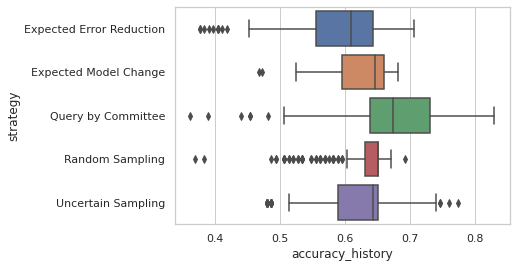

In [159]:
ax = sns.boxplot(data=df2, x="accuracy_history", y="strategy", orient="h")

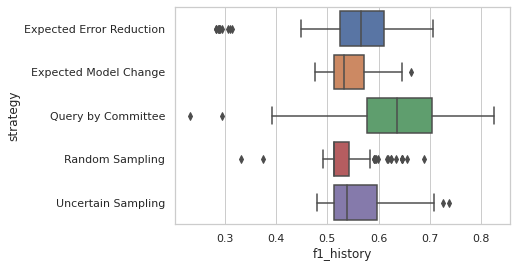

In [154]:
ax = sns.boxplot(data=df2, x="f1_history", y="strategy", orient="h"
                )

## Testes (lineplot)

In [ ]:
# Plot our performance over time.
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)


k_legend = []
for idx,pht in enumerate(performance_history_total):
    ax.plot(pht)
    ax.scatter(range(len(pht)), pht, s=13)
    k_legend.append('k = ' + str(k_neighbor[idx]))

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title("Incremental classification accuracy with {n_queries} queries".format(n_queries = N_QUERIES))
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')
ax.legend(k_legend, loc='lower right')

plt.show()

<AxesSubplot:>

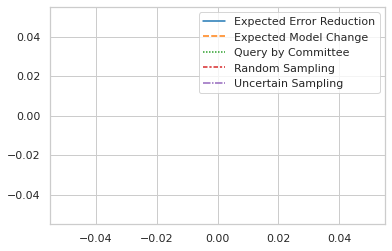

In [132]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

test = df2.groupby(['dataset','package','strategy', 'classifier', 'cost']).mean()
data = pd.DataFrame(test['accuracy_history'], df2['cost'].unique(), columns=df2['strategy'].unique())
data = data.rolling(7).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)

In [142]:
test['accuracy_history'].head(20)

dataset      package  strategy                  classifier  cost
37_diabetes  modAL    Expected Error Reduction  5NN         0       0.650685
                                                            1       0.621918
                                                            2       0.617808
                                                            3       0.645205
                                                            4       0.654795
                                                            5       0.641096
                                                            6       0.646575
                                                            7       0.635616
                                                            8       0.624658
                                                            9       0.661644
                                                            10      0.652055
                                                C4.5        0       0.646575
           